# Importing Our Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the data & Gaining Insights

In [2]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
df2 = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
df = pd.concat([df, df2], ignore_index = True)

In [50]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [7]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [8]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

Because there's only one row which is missing we will drop it

In [9]:
df.dropna(inplace = True)

# Plotting our data & Removing the outliers 

In [10]:
numerical_columns = ["Age", "Tenure", "Usage Frequency", "Support Calls", "Payment Delay", "Total Spend", "Last Interaction"]

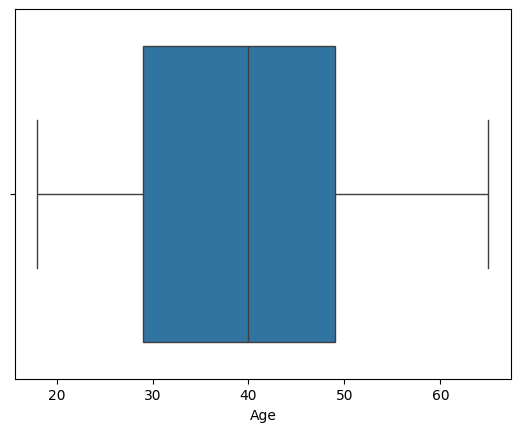

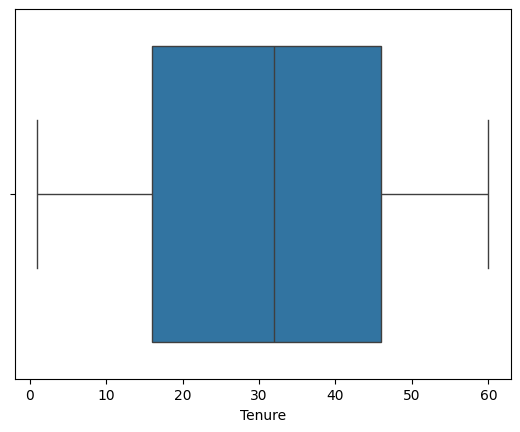

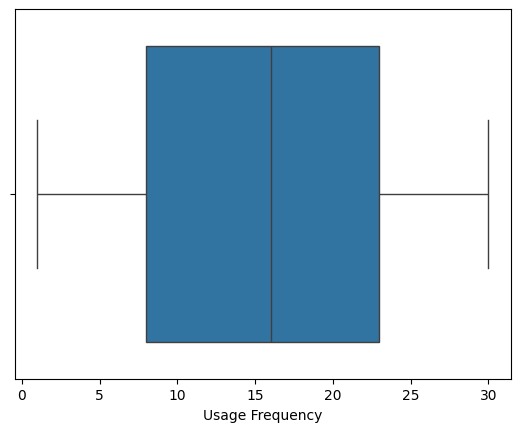

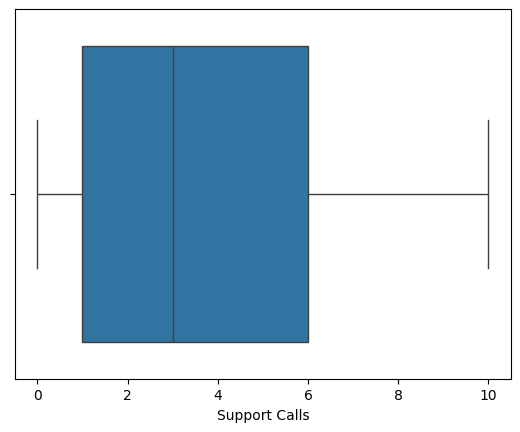

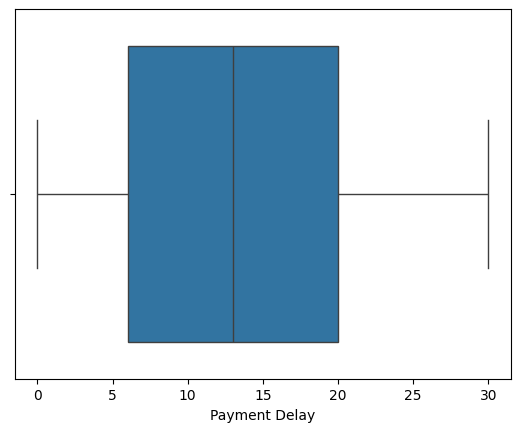

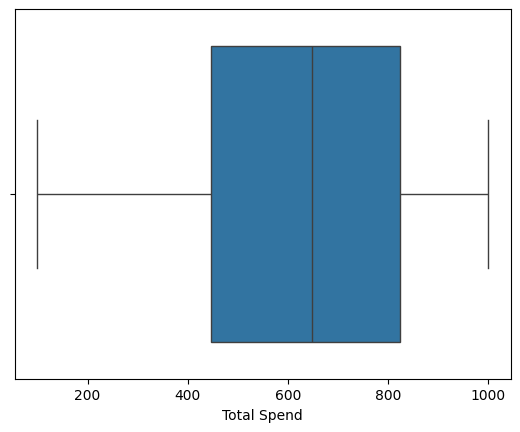

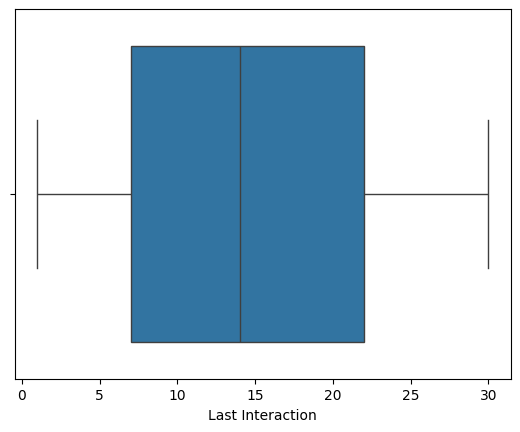

In [11]:
for i in numerical_columns:
    sns.boxplot(x = df[i])
    plt.show()

In [12]:
sns.set(style="whitegrid")

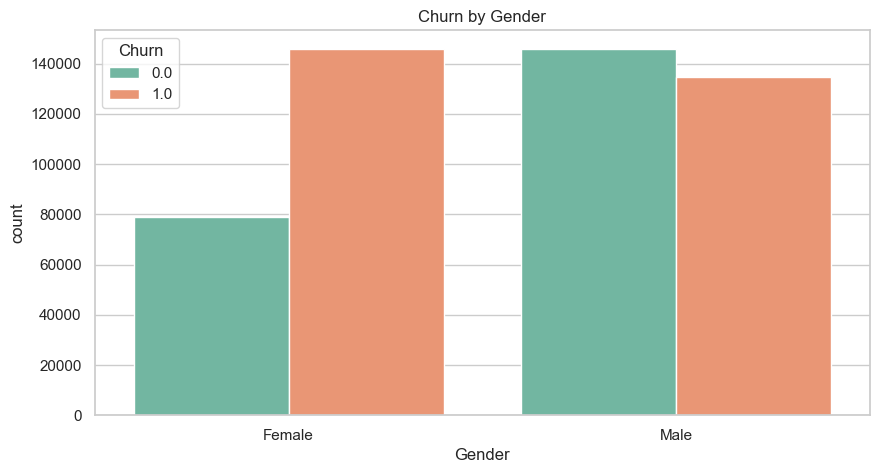

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Churn', data=df, palette="Set2")
plt.title('Churn by Gender')
plt.show()

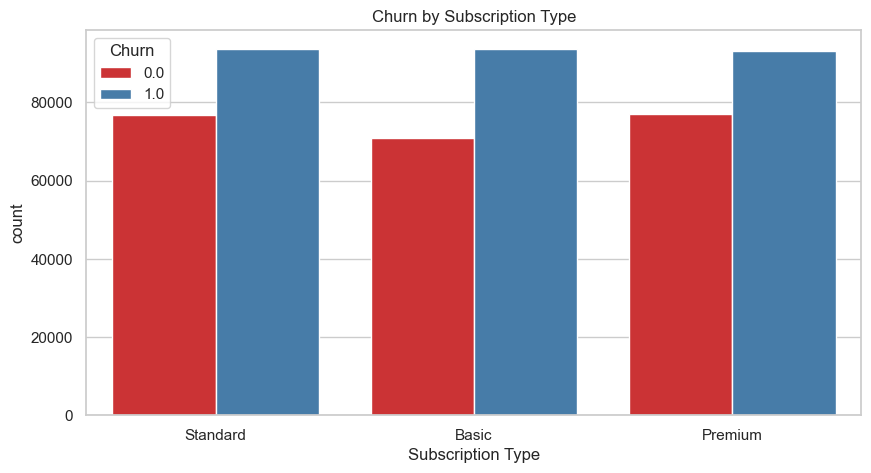

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Subscription Type', hue='Churn', data=df, palette="Set1")
plt.title('Churn by Subscription Type')
plt.show()

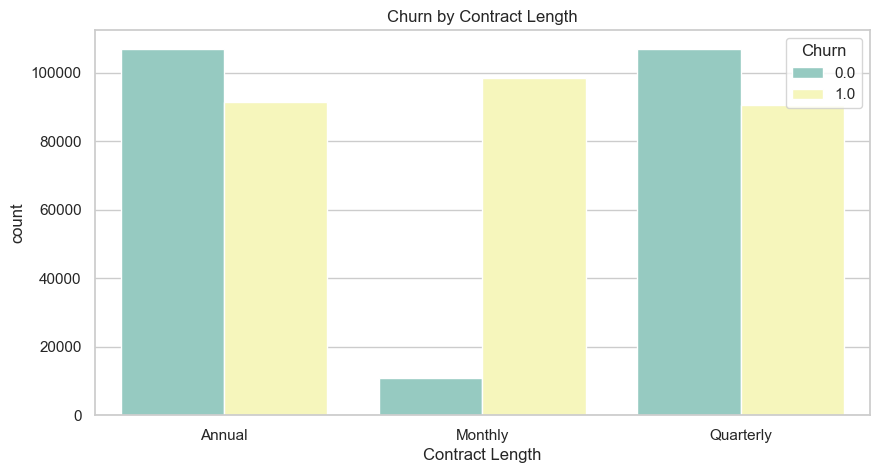

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Contract Length', hue='Churn', data=df, palette="Set3")
plt.title('Churn by Contract Length')
plt.show()

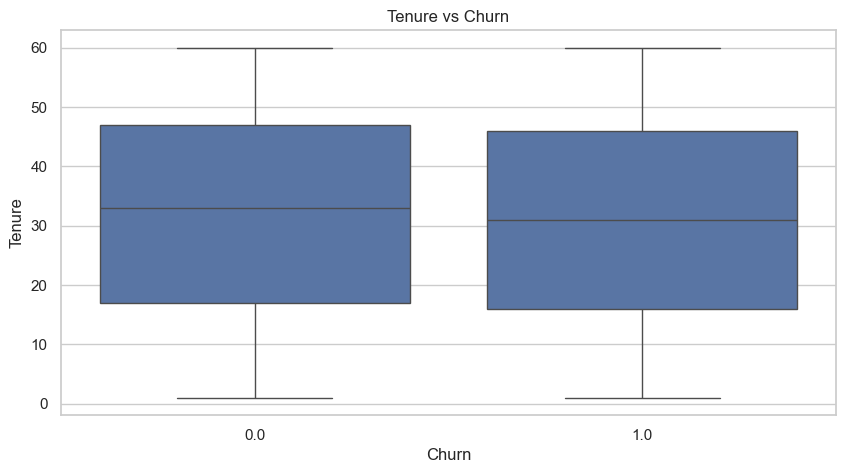

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Tenure', data = df)
plt.title('Tenure vs Churn')
plt.show()

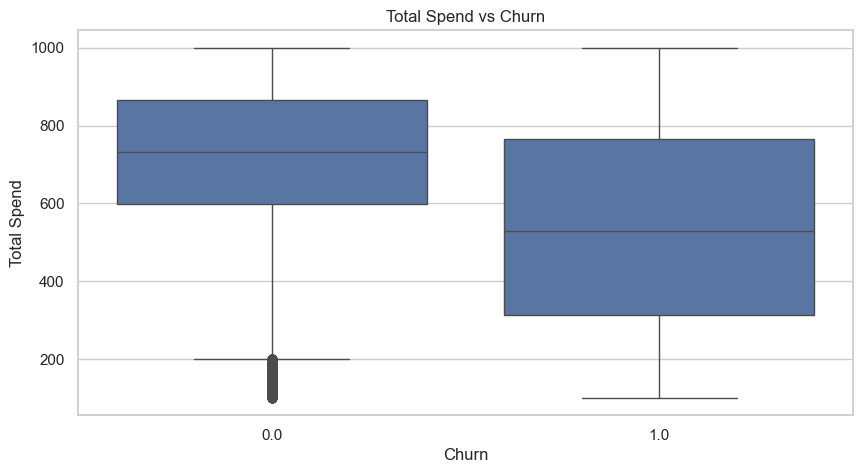

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title('Total Spend vs Churn')
plt.show()

As we can see there are no outliers

# Data Preprocessing

In [18]:
df = df.drop("CustomerID", axis = 1)

In [19]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
505202,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
Gender_le = LabelEncoder()
Subscription_le = LabelEncoder()
Contract_le = LabelEncoder()

In [22]:
df["Gender"] = Gender_le.fit_transform(df["Gender"])
df["Subscription Type"] = Subscription_le.fit_transform(df["Subscription Type"])
df["Contract Length"] = Contract_le.fit_transform(df["Contract Length"])

In [23]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
505202,45.0,0,33.0,12.0,6.0,21.0,0,2,947.0,14.0,1.0
505203,37.0,1,6.0,1.0,5.0,22.0,2,0,923.0,9.0,1.0
505204,25.0,1,39.0,14.0,8.0,30.0,1,1,327.0,20.0,1.0
505205,50.0,0,18.0,19.0,7.0,22.0,2,1,540.0,13.0,1.0


In [24]:
X = df.drop("Churn", axis = 1)
Y = df["Churn"]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
SC = StandardScaler()

In [27]:
X = SC.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Machine Learning Models

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
Regression = LogisticRegression()
Regression.fit(X_train, Y_train)

LogisticRegression()

In [32]:
Y_pred = Regression.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
Forest = RandomForestClassifier(n_estimators=25, random_state=42)

In [37]:
Forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [38]:
Y_pred = Forest.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
Tree = DecisionTreeClassifier(random_state=42)
Tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
Y_pred = Forest.predict(X_test)

In [44]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93
